## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [2]:
bs=48; sz=128
f_model = resnet34
path = "/data/jhoward/fast/dogscats/"

In [4]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data_full = ClassifierData.from_paths(path, bs, tfms)

In [17]:
data = data_full.resize(128, 'tmp') if sz<=128 else data_full

In [19]:
learn = Learner.pretrained_convnet(resnet34, data, 
                                   opt_fn=SGD_Momentum(0.9), ps=0.2, xtra_fc=[512])

In [20]:
lrf=learn.lr_find(True)

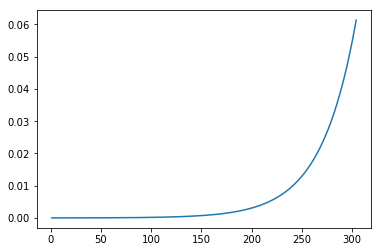

In [21]:
lrf.plot_lr()

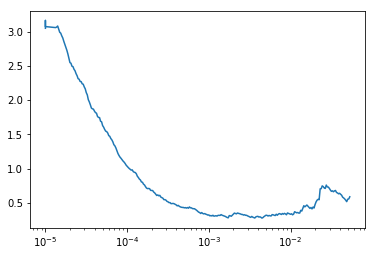

In [22]:
lrf.plot()

In [23]:
learn.fit_fc(2, 1e-3, cycle_len=1)

[0.19357995568562794, 0.10618833, 0.96230155]


[0.15366583127818306, 0.087641142, 0.96825391]



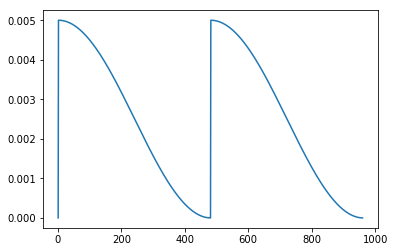

In [53]:
learn.sched.plot_lr()

In [24]:
learn.fit(1, 1e-3, cycle_len=1)

[0.11626060570049745, 0.084184401, 0.96999007]



In [25]:
learn.freeze_to(-3)

In [45]:
lrf = learn.lr_find(start_lr=1e-7)

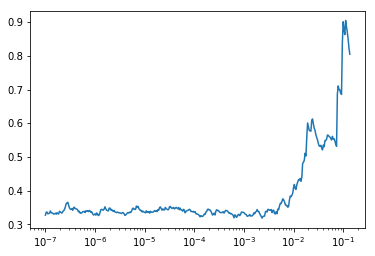

In [46]:
lrf.plot()

In [26]:
learn.fit(2, 1e-3, cycle_len=2)

[0.12650074431137215, 0.072051227, 0.97420621]


[0.09936580867591518, 0.065377787, 0.97767848]



In [27]:
learn.freeze_to(-4)

In [28]:
learn.fit(6, 1e-3, cycle_len=2)

[0.08531452286103487, 0.055883516, 0.98015875]


[0.17179770766290864, 0.053367458, 0.98065478]


[0.0626251914114628, 0.047228534, 0.98338288]


[0.0790366791272677, 0.043959312, 0.98338288]


[0.053821673357842895, 0.045142885, 0.98288691]


[0.03890380436027007, 0.042940561, 0.98387897]



## End

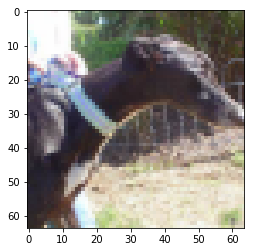

In [56]:
tfm=Transforms(64, [Scale(64)], rand_crop=True)
data = ClassifierData.from_paths(data.path, 2, (tfm, tfm))
x,y=next(iter(ds.val_dl))
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

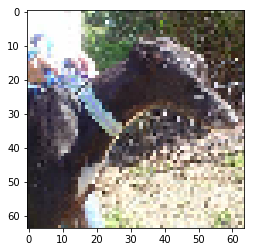

In [15]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64), interpolation=cv2.INTER_NEAREST));

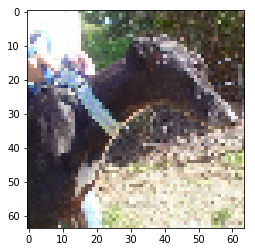

In [12]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64)));